In [3]:
%matplotlib inline
import matplotlib

1a.
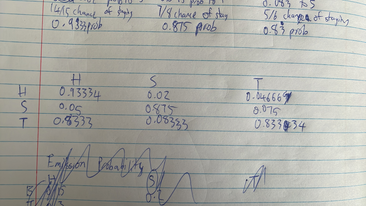


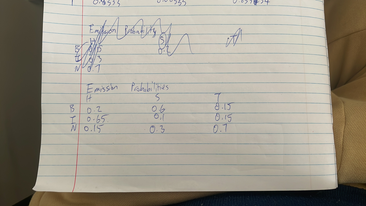

In [4]:
"""
1b.
"""
import random
import math
import numpy as np
a = [[0.93334, 0.02, 0.046667], 
     [0.05, 0.875, 0.075], 
     [0.08333, 0.08333, 0.83334]]
e = [[0.2, 0.65, 0.15], 
     [0.6, 0.1, 0.3], 
     [0.15, 0.15, 0.7]]

""" H = state 0
    S = state 1
    T = state 2
"""

def simSequence(length, a, e):
    num_states = len(a)
    num_symbols = len(e[0])
    states = [0, 1, 2]
    symbols = ['B', 'I', 'N']
    state_list = [random.choices(states)]
    state_list[0] = state_list[0][0]
    for i in range(length-1):
        current_state = state_list[-1]
        next_state = random.choices(states, weights=a[current_state])
        next_state = next_state[0]
        state_list.append(next_state)
    symbol_list = [random.choices(symbols, weights=e[state]) for state in state_list]
    for j in range(len(symbol_list)):
        symbol_list[j] = symbol_list[j][0]
    for k in range(len(state_list)):
        if state_list[k] == 0:
            state_list[k] = 'H'
        elif state_list[k] == 1:
            state_list[k] = 'S'
        else:
            state_list[k] = 'T'
    return state_list, symbol_list

states, symbols = simSequence(200, a, e)
print([i for i in states])
print()
print([j for j in symbols])
    


['S', 'S', 'S', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'S', 'S', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T']

In [5]:
"""
1c
"""
import random
import math
import numpy as np

""" Symbols:
    B = 0,
    I = 1,
    N = 2
    States:
    H = 0,
    S = 1,
    T = 2
"""
a = [[0.93334, 0.02, 0.046667], 
     [0.05, 0.875, 0.075], 
     [0.08333, 0.08333, 0.83334]]
e = [[0.2, 0.65, 0.15], 
     [0.6, 0.1, 0.3], 
     [0.15, 0.15, 0.7]]
x  = ['B','I','B','B','N','I','N','B','N','I','N','B','I','N','B','I','I','N','B','B','N','N']
pi = ['S','S','H','H','H','T','T','S','S','S','H','T','T','H','H','H','S','S','S','S','S','S']

def simLogarithmXPi(a, e, x, pi):
    symbol_conversion = [0, 1, 2]
    for i in range(len(x)):
        if x[i] == 'B':
            x[i] = 0
        elif x[i] == 'I':
            x[i] = 1
        else:
            x[i] = 2
    for k in range(len(pi)):
        if pi[k] == 'H':
            pi[k] = 0
        elif pi[k] == 'S':
            pi[k] = 1
        else:
            pi[k] = 2
    log_join = 0
    for j in range(len(x)):
        state = pi[j]
        symbol = x[j]
        emit = e[state][symbol]
        if j > 0:
            prev = pi[j-1]
            transition_prob = a[prev][state]
            log_join += math.log(transition_prob)
        log_join += math.log(emit)
    return log_join

print(simLogarithmXPi(a, e, x, pi))
print(simLogarithmXPi(a, e, symbols, states))


-53.47707852539876
-247.87447083818338


In [6]:
"""
1d.
"""
import random
import math
import numpy as np

a = [[0.93334, 0.02, 0.046667], 
     [0.05, 0.875, 0.075], 
     [0.08333, 0.08333, 0.83334]]
e = [[0.2, 0.65, 0.15], 
     [0.6, 0.1, 0.3], 
     [0.15, 0.15, 0.7]]
x = ['B','I','B','B','N','I','N','B','N','I','N','B','I','N','B','I','I','N','B','B','N','N']
x2 = ['N', 'N', 'N', 'N', 'I', 'I', 'N', 'B', 'N', 'N', 'I', 'I', 'B', 'N', 'N', 'N', 'N', 'N', 'B', 'I', 'N', 'B', 'B', 'B', 'N', 'N', 'B', 'B', 'N', 'B', 'B', 'N', 'I', 'N', 'N', 'N', 'N', 'N', 'I', 'I', 'B', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'N', 'N', 'B', 'N', 'N', 'I', 'I', 'B', 'N', 'N', 'N', 'B', 'B', 'B', 'N', 'B', 'N', 'B', 'I', 'B', 'B', 'B', 'N', 'B', 'B', 'N', 'I', 'I', 'N', 'B', 'N', 'I', 'I', 'I', 'I', 'B', 'N', 'N', 'N', 'N', 'N', 'N', 'B', 'N', 'B', 'N', 'N', 'B', 'N', 'N', 'B', 'N', 'B', 'N', 'N', 'N', 'N', 'N', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'N', 'N', 'B', 'N', 'B', 'B', 'B', 'I', 'B', 'N', 'B', 'B', 'N', 'B', 'B', 'B', 'I', 'I', 'I', 'I', 'I', 'N', 'B', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'B', 'I', 'I', 'I', 'N', 'I', 'I', 'I', 'I', 'I', 'N', 'N', 'N', 'I', 'B', 'I', 'N', 'N', 'N', 'N', 'N', 'B', 'N', 'I', 'N', 'N', 'N', 'I', 'N', 'N', 'I', 'I', 'I', 'I', 'N', 'I', 'I', 'I', 'N', 'B', 'I', 'I', 'B', 'N', 'N', 'I', 'N', 'N', 'N', 'B', 'N', 'N', 'I', 'B', 'B', 'N']

def fwd_algo(x, a, e):
    symbol_conversion = {'B': 0, 'I': 1, 'N': 2}
    x = [symbol_conversion[s] for s in x]
    matrix = [[0]]
    for j in range(1, len(a)+1):
        matrix.append([-math.inf])
    for n in range(1, len(x)+1):
        for m in range(1, len(a)+1):
            if n == 1:
                val = np.log(e[m-1][x[n-1]]) + np.log(1/3)
                matrix[m].append(val)
            else:
                lstable = []
                for k in range(1, len(a)+1):
                    lstable.append(matrix[k][n-1] + np.log(a[k-1][m-1]))
                val = np.log(e[m-1][x[n-1]]) + logsum(lstable)
                matrix[m].append(val)
    final = []
    for t in range(1, len(a)+1):
        final.append(matrix[t][-1])
    finalsum = logsum(final)
    return finalsum

def logsum(x):
    z = 0
    for i in x:
        z += np.exp(i - x[0])
    return x[0] + np.log(z)
    
a1 = fwd_algo(x, a, e)
a2 = fwd_algo(x2, a, e)
print(a1)
print(a2)
print()
print()
print('Comparison')
test = [['B'],['B','I'],['B','I','N'],['B','I','N','N']]
test_pi = [['H'],['H','H'],['H','H','S'],['H','H','S','T']]
for w in range(len(test)):
    print(fwd_algo(test[w], a, e))
print()
for y in range(len(test)):
    print(simLogarithmXPi(a, e, test[y], test_pi[y]))

-27.469809346725388
-197.60476101781708


Comparison
-1.1499055830556604
-2.5682491942726857
-3.899137556524419
-4.8503911708160805

-1.6094379124341003
-2.1092065571818734
-7.225202366935955
-10.172144476320515


My P(x, $\pi$) method has a lower probability than the forward algorithm and this stays over time. This can be seen in the small numbers in the comparison above, as well as the result when length = 200. The numbers stay around 30-40% lower consistently (except for length = 2, where forward algorithm is lower than P(x, $\pi$) ).

In [28]:
"""
2a.
"""
import random
import numpy
import matplotlib.pyplot as plt

class Node:
    def __init__(self, label=None):
        self.parent = None
        self.children = []
        self.height = -1.0
        self.label = label
        self.sequence = None

    def get_parent(self):
        return self.parent

    def set_parent(self, parent):
        self.parent = parent

    def get_children(self):
        return self.children

    def add_child(self, child):
        self.children.append(child)
        child.set_parent(self)

    def remove_child(self, child):
        self.children.remove(child)

    def set_height(self, height):
        self.height = height

    def get_height(self):
        return self.height

    def is_root(self):
        return self.parent == None

    def is_leaf(self):
        return not self.children

    def get_sequence(self):
        return self.sequence

    def set_sequence(self, sequence):
        self.sequence = sequence

    def get_label(self):
        return self.label

    def set_label(self, label):
        self.label = label

    def get_leaves(self):
        leaf_list = []

        if (self.is_leaf()):
            leaf_list.append(self)
        else:
            for child in self.children:
                leaf_list.extend(child.get_leaves())

        return leaf_list

    def get_leaf_count(self):
        if self.is_leaf():
            return 1
        else:
            return sum(map(Node.get_leaf_count, self.children))

    def get_newick(self):
        sb = ""

        if (not self.is_leaf()):
            sb += "("
            for i in range(0, len(self.children)):
                if (i>0):
                    sb += ","
                sb += self.children[i].get_newick()
            sb += ")"

        if (self.label != None):
            sb += self.label

        branch_length = -1.0
        if (not self.is_root()):
            branch_length = self.parent.height - self.height
        else:
            branch_length = 0.0
        sb += ":" + str(branch_length)
        return sb
    
class Tree:

    def __init__(self, root=None):
        self.root = root

    def set_root(self, root):
        self.root = root

    def get_root(self):
        return self.root

    def get_leaves(self):
        return self.root.get_leaves()

    def get_leaf_count(self):
        return self.root.get_leaf_count()

    def get_newick(self):
        return self.root.get_newick() + ";"

    def __str__(self):
        return self.get_newick()
    
def tree_sim(n, lbd, number_of_trees):
    heights = []
    for i in range(number_of_trees):
        k = n
        t = 0
        nodes = [str(j) for j in range(1, n+1)]
        for y in range(n):
            nodes[y] = Node(nodes[y])
        while k > 1:
            tk = random.expovariate(k*lbd)
            t = t + tk
            
            m = Node()
            m.set_height(t)
            
            i = random.choice(nodes)
            m.add_child(i)
            nodes.remove(i)
            j = random.choice(nodes)
            m.add_child(j)
            nodes.remove(j)
            nodes.append(m)
            
            k -= 1
        tree = Tree(nodes[0])
        heights.append(nodes[0].get_height())
    avg_height = sum(heights)/len(heights)
    return avg_height, tree

avg, tree = tree_sim(10, 0.5, 1000)
print(avg)

    

3.8695750972315937


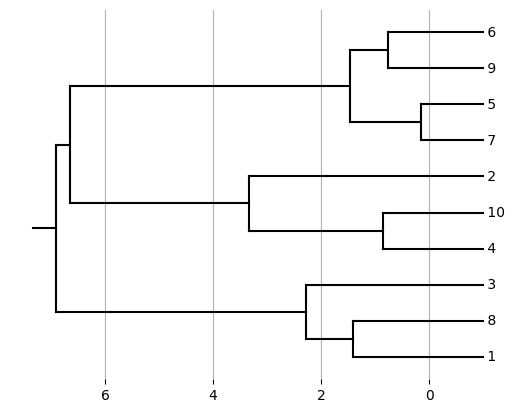

In [29]:
def plot_tree(tree):

    import itertools as it
    import numpy as np
    from matplotlib import pyplot as plt

    def compute_node_xy(node, counter=it.count()):
        node.x = node.get_height()
        if node.is_leaf():
            node.y = next(counter)
        else:
            children = node.get_children()
            for child in children:
                compute_node_xy(child, counter)
            node.y = np.mean([c.y for c in children])

    def plot_node(node):
        if node.is_leaf():
            plt.text(node.x, node.y, ' ' + node.get_label(), {'ha':'left', 'va':'center'})
        else:
            children = node.get_children()
            plt.plot([node.x] * 2, [min(c.y for c in children), max(c.y for c in children)], 'k')
            for child in children:
                plt.plot([node.x, child.x], [child.y] * 2, 'k')
                plot_node(child)

    root = tree.get_root()
    compute_node_xy(root)
    plt.plot([root.x, root.x + root.x/16], [root.y] * 2, 'k')
    plot_node(root)
    lc = tree.get_leaf_count()
    plt.ylim(- lc / 16, 17/16 * lc - 1)
    axes = plt.gca()
    axes.invert_xaxis()
    axes.yaxis.set_visible(False)
    axes.set_frame_on(False)
    axes.grid()

plot_tree(tree)

[1, 0, 0, 2, 1, 2, 0, 1, 3, 1, 0, 1, 0, 3, 3, 0, 1, 3, 2, 1]
[3, 3, 0, 0, 1, 1, 2, 1, 1, 2, 0, 3, 0, 1, 2, 0, 2, 2, 1, 1]
[3, 3, 3, 0, 1, 0, 3, 1, 1, 2, 0, 3, 0, 0, 2, 1, 2, 2, 1, 1]
[2, 3, 2, 2, 3, 2, 2, 1, 1, 0, 3, 3, 0, 1, 1, 0, 2, 1, 3, 3]
[3, 3, 0, 0, 0, 0, 3, 2, 3, 2, 1, 3, 1, 3, 2, 2, 2, 3, 1, 1]
[3, 3, 1, 0, 0, 2, 1, 0, 2, 2, 2, 3, 0, 3, 1, 0, 0, 2, 2, 0]
[0, 0, 0, 2, 1, 2, 0, 1, 3, 1, 2, 0, 0, 3, 3, 2, 1, 3, 2, 1]
[0, 2, 3, 1, 1, 0, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 1, 3, 1, 1]
[3, 2, 0, 1, 1, 3, 2, 1, 2, 3, 1, 0, 2, 2, 3, 0, 1, 0, 1, 2]
[3, 2, 0, 2, 0, 1, 0, 1, 2, 3, 1, 0, 3, 2, 1, 0, 1, 1, 2, 2]
[2, 2, 0, 1, 2, 2, 0, 3, 2, 2, 1, 2, 1, 0, 3, 2, 1, 0, 3, 2]
[2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 3, 0, 2, 3, 1]
[2, 2, 3, 1, 2, 1, 2, 1, 0, 3, 2, 2, 2, 2, 3, 2, 3, 0, 0, 2]
[2, 2, 3, 3, 3, 3, 2, 1, 0, 1, 0, 2, 3, 2, 3, 2, 0, 2, 1, 0]
[2, 1, 3, 3, 3, 0, 2, 2, 1, 1, 0, 2, 3, 3, 1, 3, 0, 3, 1, 3]
[2, 2, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 0, 2, 3, 2]
[1, 2, 3, 1, 2, 1, 3, 0,

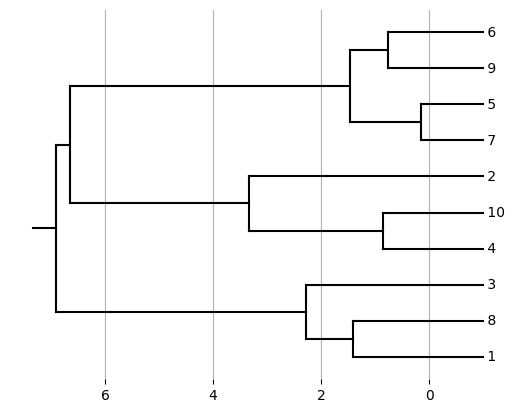

In [102]:
"""2b.
A: 0
C: 1
G: 2
T: 3

This code puts the sequence in the nodes of the tree.
"""


def mutate(X,t,mu):
    import numpy.random as rand
    L= len(X)
    mutatedSeq = X.copy()
    numMutation = rand.poisson(L*mu*t)
    for i in range(numMutation):
        site = rand.randint(0,L)
        mutatedSeq[site] = rand.randint(0,4)
    return mutatedSeq

def jukesCantor(tree, length, mu):
    root = tree.get_root()
    n = tree.get_leaf_count()
    numbers = [0, 1, 2, 3]
    root.set_sequence(random.choices(numbers, k = length))
    c1, c2 = root.get_children()
    goDown(c1, mu)
    goDown(c2, mu)
    l = [root.get_sequence()]
    print_seq(c1, l)
    print_seq(c2, l)
    return tree, l

def goDown(node, mu):
    if node is None:
        return
    br_l = node.get_parent().get_height() - node.get_height()
    seq_mutate = mutate(node.get_parent().get_sequence(), br_l, mu)
    node.set_sequence(seq_mutate)
    for child in node.get_children():
        goDown(child, mu)

def print_seq(node, l):
    if node is None:
        return
    l.append(node.get_sequence())
    for child in node.get_children():
        print_seq(child, l)

a, l= jukesCantor(tree, 20, 0.5)
for i in l:
    print(i)


In [111]:
"""2c.
A: 0
C: 1
G: 2
T: 3
I used the results from the above tree, where n = 10, lambda = 0.5, mu = 0.5, and length = 20
"""
import numpy as np

def dist_betwn_seqs(seq1, seq2):
    length = len(seq1)
    difference_count = sum(j != k for j, k in zip(seq1, seq2))
    fxy = min(difference_count/length, 0.75-(1/length))
    dxy = -(3/4) * np.log(1-(4*fxy/3))
    return dxy

def j_c_matrix(sequences):
    length = len(sequences)
    matrix = np.zeros((length, length))
    for i in range(length):
        for j in range(i + 1, length):
            dist = dist_betwn_seqs(sequences[i], sequences[j])
            matrix[i, j] = dist
            matrix[j, i] = dist
    return matrix

print(j_c_matrix(l))

[[0.         1.51117727 2.03103765 2.03103765 2.03103765 2.03103765
  0.2326162  1.20707843 2.03103765 1.51117727 2.03103765 2.03103765
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.03103765
  2.03103765]
 [1.51117727 0.         0.30409883 0.99131688 0.82395922 1.20707843
  2.03103765 2.03103765 1.51117727 2.03103765 2.03103765 1.51117727
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 1.51117727
  2.03103765]
 [2.03103765 0.30409883 0.         2.03103765 0.68721805 1.51117727
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.03103765
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.03103765
  2.03103765]
 [2.03103765 0.99131688 2.03103765 0.         2.03103765 2.03103765
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.03103765
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.03103765
  2.03103765]
 [2.03103765 0.82395922 0.68721805 2.03103765 0.         1.51117727
  2.03103765 2.03103765 2.03103765 2.03103765 2.03103765 2.0

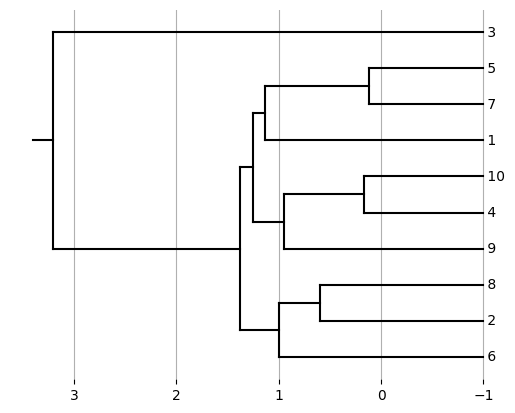

In [112]:
"""
2d.
"""

avg2, new_tree = tree_sim(10, 0.5, 1000)
plot_tree(new_tree)

In [113]:
tree20, seq20 = jukesCantor(new_tree, 20, 0.1)
tree50, seq50 = jukesCantor(new_tree, 50, 0.1)
tree200, seq200 = jukesCantor(new_tree, 200, 0.1)
mat20 = j_c_matrix(seq20)
mat50 = j_c_matrix(seq50)
mat200 = j_c_matrix(seq200)

def compute_upgma_tree(matrix):

    import itertools as it

    n = len(matrix)
    nodes = [Node(str(i + 1)) for i in range(n)]
    for node in nodes:
        node.set_height(0)
    matrix = {nodes[i]: {nodes[j]: matrix[i][j] for j in range(n)} for i in range(n)}
    while len(matrix) > 1:
        a, b = min(it.combinations(matrix.keys(), 2), key=lambda xy: matrix[xy[0]][xy[1]])
        u = Node()
        u.add_child(a)
        u.add_child(b)
        u.set_height(matrix[a][b] / 2)
        uc = {c: (a.get_leaf_count() * matrix[a][c] + b.get_leaf_count() * matrix[b][c]) / (a.get_leaf_count() + b.get_leaf_count()) for c in matrix.keys() - set((a, b))}
        del matrix[a]
        del matrix[b]
        for k, v in matrix.items():
            del v[a]
            del v[b]
            v[u] = uc[k]
        matrix[u] = uc
    return Tree(u)

tree20_new = compute_upgma_tree(mat20)
tree50_new = compute_upgma_tree(mat50)
tree200_new = compute_upgma_tree(mat200)

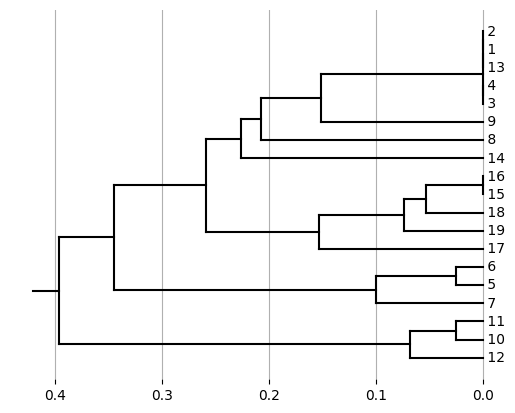

In [108]:
plot_tree(tree20_new)

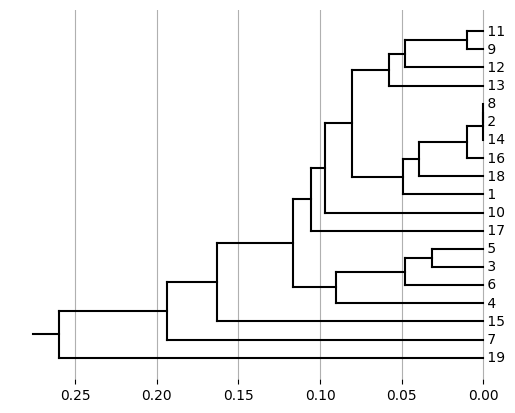

In [114]:
plot_tree(tree50_new)

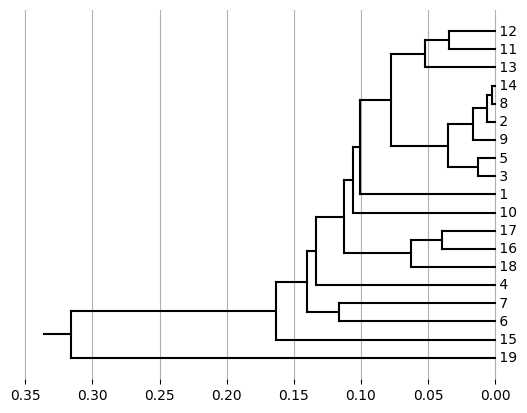

In [115]:
plot_tree(tree200_new)

The reconstructions are inaccurate as it produces almost double the leaves compared to the initial tree. As the length of the sequences get longer, the more the tree narrows. Some values are changing places in the tree as well. 